In [7]:
'''
audio covid-19  AI


'''

from tensorflow import keras

from datetime import datetime
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Conv3D, MaxPooling3D, Activation, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from sklearn.utils import class_weight

import keras.backend as K
import imageio

import random
import pandas as pd
import numpy as np
import os

import skimage
from skimage import io

from PIL import Image
from tqdm.auto import tqdm

from sklearn.preprocessing import OneHotEncoder

from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt

# import PyQt5 
# %matplotlib qt

import warnings
warnings.filterwarnings(action='ignore') 


In [8]:


device_no = '/cpu:0'

class_num = 2

# model 생성

n_filter = 64; 
kernel1 = (3, 3); 
padding1 = 'same' 
strides1 = (1, 1)
input_shape = (128, 128, 3)
pool_size1 = (2, 2)
pool_size2 = (2, 2)

learning_rate = 0.00001    #0.000001  #0.000001  #0.00001  #0.000001

with K.tf.device(device_no):

    model = Sequential()
    model.add(Conv2D(filters=n_filter, kernel_size=kernel1, padding=padding1, strides=strides1, input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=pool_size2) )

    model.add(Conv2D(filters=2*n_filter, kernel_size=kernel1, padding=padding1, strides=strides1) )
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=pool_size1) )         

    model.add( Conv2D(filters=4*n_filter, kernel_size=kernel1, padding=padding1, strides=strides1))
    model.add( Activation("relu"))
    model.add(MaxPooling2D(pool_size=pool_size1)  )   

    model.add( Conv2D(filters=8*n_filter, kernel_size=kernel1, padding=padding1, strides=strides1))
    model.add( Activation("relu"))
    model.add(MaxPooling2D(pool_size=pool_size1)  )

    model.add(Flatten()) 
    model.add(Dense(64))
    model.add(Activation("relu"))

    model.add(Dropout(0.5))

    model.add(Dense(class_num, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
        

       

TRAINING/VALIDATAION DATA: 0, png=mfcc_00001.png, id=00001, covid19=0
(128, 128, 3)


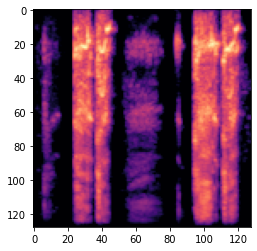

TRAINING/VALIDATAION DATA: 1, png=mfcc_00002.png, id=00002, covid19=0
TRAINING/VALIDATAION DATA: 2, png=mfcc_00003.png, id=00003, covid19=0
TRAINING/VALIDATAION DATA: 3, png=mfcc_00004.png, id=00004, covid19=0
TRAINING/VALIDATAION DATA: 4, png=mfcc_00005.png, id=00005, covid19=0
TRAINING/VALIDATAION DATA: 5, png=mfcc_00006.png, id=00006, covid19=0
TRAINING/VALIDATAION DATA: 6, png=mfcc_00007.png, id=00007, covid19=1
TRAINING/VALIDATAION DATA: 7, png=mfcc_00008.png, id=00008, covid19=0
TRAINING/VALIDATAION DATA: 8, png=mfcc_00009.png, id=00009, covid19=0
TRAINING/VALIDATAION DATA: 9, png=mfcc_00010.png, id=00010, covid19=0
TRAINING/VALIDATAION DATA: 10, png=mfcc_00011.png, id=00011, covid19=0
TRAINING/VALIDATAION DATA: 11, png=mfcc_00012.png, id=00012, covid19=0
TRAINING/VALIDATAION DATA: 12, png=mfcc_00013.png, id=00013, covid19=0
TRAINING/VALIDATAION DATA: 13, png=mfcc_00014.png, id=00014, covid19=0
TRAINING/VALIDATAION DATA: 14, png=mfcc_00015.png, id=00015, covid19=1
TRAINING/VALIDA

TRAINING/VALIDATAION DATA: 173, png=mfcc_00174.png, id=00174, covid19=0
TRAINING/VALIDATAION DATA: 174, png=mfcc_00175.png, id=00175, covid19=1
TRAINING/VALIDATAION DATA: 175, png=mfcc_00176.png, id=00176, covid19=0
TRAINING/VALIDATAION DATA: 176, png=mfcc_00177.png, id=00177, covid19=1
TRAINING/VALIDATAION DATA: 177, png=mfcc_00178.png, id=00178, covid19=1
TRAINING/VALIDATAION DATA: 178, png=mfcc_00179.png, id=00179, covid19=0
TRAINING/VALIDATAION DATA: 179, png=mfcc_00180.png, id=00180, covid19=0
TRAINING/VALIDATAION DATA: 180, png=mfcc_00181.png, id=00181, covid19=0
TRAINING/VALIDATAION DATA: 181, png=mfcc_00182.png, id=00182, covid19=0
TRAINING/VALIDATAION DATA: 182, png=mfcc_00183.png, id=00183, covid19=0
TRAINING/VALIDATAION DATA: 183, png=mfcc_00184.png, id=00184, covid19=0
TRAINING/VALIDATAION DATA: 184, png=mfcc_00185.png, id=00185, covid19=1
TRAINING/VALIDATAION DATA: 185, png=mfcc_00186.png, id=00186, covid19=0
TRAINING/VALIDATAION DATA: 186, png=mfcc_00187.png, id=00187, co

TRAINING/VALIDATAION DATA: 351, png=mfcc_00352.png, id=00352, covid19=0
TRAINING/VALIDATAION DATA: 352, png=mfcc_00353.png, id=00353, covid19=0
TRAINING/VALIDATAION DATA: 353, png=mfcc_00354.png, id=00354, covid19=0
TRAINING/VALIDATAION DATA: 354, png=mfcc_00355.png, id=00355, covid19=0
TRAINING/VALIDATAION DATA: 355, png=mfcc_00356.png, id=00356, covid19=0
TRAINING/VALIDATAION DATA: 356, png=mfcc_00357.png, id=00357, covid19=0
TRAINING/VALIDATAION DATA: 357, png=mfcc_00358.png, id=00358, covid19=0
TRAINING/VALIDATAION DATA: 358, png=mfcc_00359.png, id=00359, covid19=0
TRAINING/VALIDATAION DATA: 359, png=mfcc_00360.png, id=00360, covid19=0
TRAINING/VALIDATAION DATA: 360, png=mfcc_00361.png, id=00361, covid19=0
TRAINING/VALIDATAION DATA: 361, png=mfcc_00362.png, id=00362, covid19=0
TRAINING/VALIDATAION DATA: 362, png=mfcc_00363.png, id=00363, covid19=0
TRAINING/VALIDATAION DATA: 363, png=mfcc_00364.png, id=00364, covid19=0
TRAINING/VALIDATAION DATA: 364, png=mfcc_00365.png, id=00365, co

TRAINING/VALIDATAION DATA: 547, png=mfcc_00548.png, id=00548, covid19=0
TRAINING/VALIDATAION DATA: 548, png=mfcc_00549.png, id=00549, covid19=0
TRAINING/VALIDATAION DATA: 549, png=mfcc_00550.png, id=00550, covid19=0
TRAINING/VALIDATAION DATA: 550, png=mfcc_00551.png, id=00551, covid19=0
TRAINING/VALIDATAION DATA: 551, png=mfcc_00552.png, id=00552, covid19=0
TRAINING/VALIDATAION DATA: 552, png=mfcc_00553.png, id=00553, covid19=1
TRAINING/VALIDATAION DATA: 553, png=mfcc_00554.png, id=00554, covid19=0
TRAINING/VALIDATAION DATA: 554, png=mfcc_00555.png, id=00555, covid19=0
TRAINING/VALIDATAION DATA: 555, png=mfcc_00556.png, id=00556, covid19=0
TRAINING/VALIDATAION DATA: 556, png=mfcc_00557.png, id=00557, covid19=0
TRAINING/VALIDATAION DATA: 557, png=mfcc_00558.png, id=00558, covid19=0
TRAINING/VALIDATAION DATA: 558, png=mfcc_00559.png, id=00559, covid19=0
TRAINING/VALIDATAION DATA: 559, png=mfcc_00560.png, id=00560, covid19=0
TRAINING/VALIDATAION DATA: 560, png=mfcc_00561.png, id=00561, co

TRAINING/VALIDATAION DATA: 726, png=mfcc_00727.png, id=00727, covid19=0
TRAINING/VALIDATAION DATA: 727, png=mfcc_00728.png, id=00728, covid19=0
TRAINING/VALIDATAION DATA: 728, png=mfcc_00729.png, id=00729, covid19=0
TRAINING/VALIDATAION DATA: 729, png=mfcc_00730.png, id=00730, covid19=0
TRAINING/VALIDATAION DATA: 730, png=mfcc_00731.png, id=00731, covid19=0
TRAINING/VALIDATAION DATA: 731, png=mfcc_00732.png, id=00732, covid19=0
TRAINING/VALIDATAION DATA: 732, png=mfcc_00733.png, id=00733, covid19=0
TRAINING/VALIDATAION DATA: 733, png=mfcc_00734.png, id=00734, covid19=0
TRAINING/VALIDATAION DATA: 734, png=mfcc_00735.png, id=00735, covid19=0
TRAINING/VALIDATAION DATA: 735, png=mfcc_00736.png, id=00736, covid19=0
TRAINING/VALIDATAION DATA: 736, png=mfcc_00737.png, id=00737, covid19=0
TRAINING/VALIDATAION DATA: 737, png=mfcc_00738.png, id=00738, covid19=0
TRAINING/VALIDATAION DATA: 738, png=mfcc_00739.png, id=00739, covid19=0
TRAINING/VALIDATAION DATA: 739, png=mfcc_00740.png, id=00740, co

TRAINING/VALIDATAION DATA: 937, png=mfcc_00938.png, id=00938, covid19=0
TRAINING/VALIDATAION DATA: 938, png=mfcc_00939.png, id=00939, covid19=0
TRAINING/VALIDATAION DATA: 939, png=mfcc_00940.png, id=00940, covid19=0
TRAINING/VALIDATAION DATA: 940, png=mfcc_00941.png, id=00941, covid19=0
TRAINING/VALIDATAION DATA: 941, png=mfcc_00942.png, id=00942, covid19=0
TRAINING/VALIDATAION DATA: 942, png=mfcc_00943.png, id=00943, covid19=0
TRAINING/VALIDATAION DATA: 943, png=mfcc_00944.png, id=00944, covid19=0
TRAINING/VALIDATAION DATA: 944, png=mfcc_00945.png, id=00945, covid19=0
TRAINING/VALIDATAION DATA: 945, png=mfcc_00946.png, id=00946, covid19=0
TRAINING/VALIDATAION DATA: 946, png=mfcc_00947.png, id=00947, covid19=0
TRAINING/VALIDATAION DATA: 947, png=mfcc_00948.png, id=00948, covid19=0
TRAINING/VALIDATAION DATA: 948, png=mfcc_00949.png, id=00949, covid19=0
TRAINING/VALIDATAION DATA: 949, png=mfcc_00950.png, id=00950, covid19=1
TRAINING/VALIDATAION DATA: 950, png=mfcc_00951.png, id=00951, co

TRAINING/VALIDATAION DATA: 1131, png=mfcc_01132.png, id=01132, covid19=0
TRAINING/VALIDATAION DATA: 1132, png=mfcc_01133.png, id=01133, covid19=0
TRAINING/VALIDATAION DATA: 1133, png=mfcc_01134.png, id=01134, covid19=0
TRAINING/VALIDATAION DATA: 1134, png=mfcc_01135.png, id=01135, covid19=0
TRAINING/VALIDATAION DATA: 1135, png=mfcc_01136.png, id=01136, covid19=0
TRAINING/VALIDATAION DATA: 1136, png=mfcc_01137.png, id=01137, covid19=0
TRAINING/VALIDATAION DATA: 1137, png=mfcc_01138.png, id=01138, covid19=0
TRAINING/VALIDATAION DATA: 1138, png=mfcc_01139.png, id=01139, covid19=0
TRAINING/VALIDATAION DATA: 1139, png=mfcc_01140.png, id=01140, covid19=0
TRAINING/VALIDATAION DATA: 1140, png=mfcc_01141.png, id=01141, covid19=0
TRAINING/VALIDATAION DATA: 1141, png=mfcc_01142.png, id=01142, covid19=0
TRAINING/VALIDATAION DATA: 1142, png=mfcc_01143.png, id=01143, covid19=0
TRAINING/VALIDATAION DATA: 1143, png=mfcc_01144.png, id=01144, covid19=0
TRAINING/VALIDATAION DATA: 1144, png=mfcc_01145.png

TRAINING/VALIDATAION DATA: 1267, png=mfcc_01268.png, id=01268, covid19=0
TRAINING/VALIDATAION DATA: 1268, png=mfcc_01269.png, id=01269, covid19=0
TRAINING/VALIDATAION DATA: 1269, png=mfcc_01270.png, id=01270, covid19=0
TRAINING/VALIDATAION DATA: 1270, png=mfcc_01271.png, id=01271, covid19=0
TRAINING/VALIDATAION DATA: 1271, png=mfcc_01272.png, id=01272, covid19=0
TRAINING/VALIDATAION DATA: 1272, png=mfcc_01273.png, id=01273, covid19=0
TRAINING/VALIDATAION DATA: 1273, png=mfcc_01274.png, id=01274, covid19=0
TRAINING/VALIDATAION DATA: 1274, png=mfcc_01275.png, id=01275, covid19=0
TRAINING/VALIDATAION DATA: 1275, png=mfcc_01276.png, id=01276, covid19=0
TRAINING/VALIDATAION DATA: 1276, png=mfcc_01277.png, id=01277, covid19=0
TRAINING/VALIDATAION DATA: 1277, png=mfcc_01278.png, id=01278, covid19=0
TRAINING/VALIDATAION DATA: 1278, png=mfcc_01279.png, id=01279, covid19=1
TRAINING/VALIDATAION DATA: 1279, png=mfcc_01280.png, id=01280, covid19=1
TRAINING/VALIDATAION DATA: 1280, png=mfcc_01281.png

TRAINING/VALIDATAION DATA: 1454, png=mfcc_01455.png, id=01455, covid19=0
TRAINING/VALIDATAION DATA: 1455, png=mfcc_01456.png, id=01456, covid19=0
TRAINING/VALIDATAION DATA: 1456, png=mfcc_01457.png, id=01457, covid19=0
TRAINING/VALIDATAION DATA: 1457, png=mfcc_01458.png, id=01458, covid19=0
TRAINING/VALIDATAION DATA: 1458, png=mfcc_01459.png, id=01459, covid19=0
TRAINING/VALIDATAION DATA: 1459, png=mfcc_01460.png, id=01460, covid19=0
TRAINING/VALIDATAION DATA: 1460, png=mfcc_01461.png, id=01461, covid19=0
TRAINING/VALIDATAION DATA: 1461, png=mfcc_01462.png, id=01462, covid19=0
TRAINING/VALIDATAION DATA: 1462, png=mfcc_01463.png, id=01463, covid19=0
TRAINING/VALIDATAION DATA: 1463, png=mfcc_01464.png, id=01464, covid19=0
TRAINING/VALIDATAION DATA: 1464, png=mfcc_01465.png, id=01465, covid19=0
TRAINING/VALIDATAION DATA: 1465, png=mfcc_01466.png, id=01466, covid19=0
TRAINING/VALIDATAION DATA: 1466, png=mfcc_01467.png, id=01467, covid19=0
TRAINING/VALIDATAION DATA: 1467, png=mfcc_01468.png

TRAINING/VALIDATAION DATA: 1580, png=mfcc_01581.png, id=01581, covid19=1
TRAINING/VALIDATAION DATA: 1581, png=mfcc_01582.png, id=01582, covid19=0
TRAINING/VALIDATAION DATA: 1582, png=mfcc_01583.png, id=01583, covid19=0
TRAINING/VALIDATAION DATA: 1583, png=mfcc_01584.png, id=01584, covid19=0
TRAINING/VALIDATAION DATA: 1584, png=mfcc_01585.png, id=01585, covid19=0
TRAINING/VALIDATAION DATA: 1585, png=mfcc_01586.png, id=01586, covid19=0
TRAINING/VALIDATAION DATA: 1586, png=mfcc_01587.png, id=01587, covid19=0
TRAINING/VALIDATAION DATA: 1587, png=mfcc_01588.png, id=01588, covid19=0
TRAINING/VALIDATAION DATA: 1588, png=mfcc_01589.png, id=01589, covid19=0
TRAINING/VALIDATAION DATA: 1589, png=mfcc_01590.png, id=01590, covid19=0
TRAINING/VALIDATAION DATA: 1590, png=mfcc_01591.png, id=01591, covid19=0
TRAINING/VALIDATAION DATA: 1591, png=mfcc_01592.png, id=01592, covid19=1
TRAINING/VALIDATAION DATA: 1592, png=mfcc_01593.png, id=01593, covid19=0
TRAINING/VALIDATAION DATA: 1593, png=mfcc_01594.png

TRAINING/VALIDATAION DATA: 1813, png=mfcc_01814.png, id=01814, covid19=0
TRAINING/VALIDATAION DATA: 1814, png=mfcc_01815.png, id=01815, covid19=0
TRAINING/VALIDATAION DATA: 1815, png=mfcc_01816.png, id=01816, covid19=0
TRAINING/VALIDATAION DATA: 1816, png=mfcc_01817.png, id=01817, covid19=0
TRAINING/VALIDATAION DATA: 1817, png=mfcc_01818.png, id=01818, covid19=0
TRAINING/VALIDATAION DATA: 1818, png=mfcc_01819.png, id=01819, covid19=0
TRAINING/VALIDATAION DATA: 1819, png=mfcc_01820.png, id=01820, covid19=1
TRAINING/VALIDATAION DATA: 1820, png=mfcc_01821.png, id=01821, covid19=0
TRAINING/VALIDATAION DATA: 1821, png=mfcc_01822.png, id=01822, covid19=0
TRAINING/VALIDATAION DATA: 1822, png=mfcc_01823.png, id=01823, covid19=0
TRAINING/VALIDATAION DATA: 1823, png=mfcc_01824.png, id=01824, covid19=0
TRAINING/VALIDATAION DATA: 1824, png=mfcc_01825.png, id=01825, covid19=0
TRAINING/VALIDATAION DATA: 1825, png=mfcc_01826.png, id=01826, covid19=1
TRAINING/VALIDATAION DATA: 1826, png=mfcc_01827.png

TRAINING/VALIDATAION DATA: 1935, png=mfcc_01936.png, id=01936, covid19=0
TRAINING/VALIDATAION DATA: 1936, png=mfcc_01937.png, id=01937, covid19=0
TRAINING/VALIDATAION DATA: 1937, png=mfcc_01938.png, id=01938, covid19=0
TRAINING/VALIDATAION DATA: 1938, png=mfcc_01939.png, id=01939, covid19=0
TRAINING/VALIDATAION DATA: 1939, png=mfcc_01940.png, id=01940, covid19=0
TRAINING/VALIDATAION DATA: 1940, png=mfcc_01941.png, id=01941, covid19=0
TRAINING/VALIDATAION DATA: 1941, png=mfcc_01942.png, id=01942, covid19=0
TRAINING/VALIDATAION DATA: 1942, png=mfcc_01943.png, id=01943, covid19=0
TRAINING/VALIDATAION DATA: 1943, png=mfcc_01944.png, id=01944, covid19=0
TRAINING/VALIDATAION DATA: 1944, png=mfcc_01945.png, id=01945, covid19=0
TRAINING/VALIDATAION DATA: 1945, png=mfcc_01946.png, id=01946, covid19=0
TRAINING/VALIDATAION DATA: 1946, png=mfcc_01947.png, id=01947, covid19=0
TRAINING/VALIDATAION DATA: 1947, png=mfcc_01948.png, id=01948, covid19=0
TRAINING/VALIDATAION DATA: 1948, png=mfcc_01949.png

TRAINING/VALIDATAION DATA: 2078, png=mfcc_02079.png, id=02079, covid19=0
TRAINING/VALIDATAION DATA: 2079, png=mfcc_02080.png, id=02080, covid19=0
TRAINING/VALIDATAION DATA: 2080, png=mfcc_02081.png, id=02081, covid19=0
TRAINING/VALIDATAION DATA: 2081, png=mfcc_02082.png, id=02082, covid19=0
TRAINING/VALIDATAION DATA: 2082, png=mfcc_02083.png, id=02083, covid19=0
TRAINING/VALIDATAION DATA: 2083, png=mfcc_02084.png, id=02084, covid19=0
TRAINING/VALIDATAION DATA: 2084, png=mfcc_02085.png, id=02085, covid19=0
TRAINING/VALIDATAION DATA: 2085, png=mfcc_02086.png, id=02086, covid19=0
TRAINING/VALIDATAION DATA: 2086, png=mfcc_02087.png, id=02087, covid19=0
TRAINING/VALIDATAION DATA: 2087, png=mfcc_02088.png, id=02088, covid19=1
TRAINING/VALIDATAION DATA: 2088, png=mfcc_02089.png, id=02089, covid19=0
TRAINING/VALIDATAION DATA: 2089, png=mfcc_02090.png, id=02090, covid19=0
TRAINING/VALIDATAION DATA: 2090, png=mfcc_02091.png, id=02091, covid19=0
TRAINING/VALIDATAION DATA: 2091, png=mfcc_02092.png

TRAINING/VALIDATAION DATA: 2191, png=mfcc_02192.png, id=02192, covid19=0
TRAINING/VALIDATAION DATA: 2192, png=mfcc_02193.png, id=02193, covid19=0
TRAINING/VALIDATAION DATA: 2193, png=mfcc_02194.png, id=02194, covid19=0
TRAINING/VALIDATAION DATA: 2194, png=mfcc_02195.png, id=02195, covid19=1
TRAINING/VALIDATAION DATA: 2195, png=mfcc_02196.png, id=02196, covid19=0
TRAINING/VALIDATAION DATA: 2196, png=mfcc_02197.png, id=02197, covid19=1
TRAINING/VALIDATAION DATA: 2197, png=mfcc_02198.png, id=02198, covid19=0
TRAINING/VALIDATAION DATA: 2198, png=mfcc_02199.png, id=02199, covid19=0
TRAINING/VALIDATAION DATA: 2199, png=mfcc_02200.png, id=02200, covid19=0
TRAINING/VALIDATAION DATA: 2200, png=mfcc_02201.png, id=02201, covid19=0
TRAINING/VALIDATAION DATA: 2201, png=mfcc_02202.png, id=02202, covid19=0
TRAINING/VALIDATAION DATA: 2202, png=mfcc_02203.png, id=02203, covid19=0
TRAINING/VALIDATAION DATA: 2203, png=mfcc_02204.png, id=02204, covid19=0
TRAINING/VALIDATAION DATA: 2204, png=mfcc_02205.png

TRAINING/VALIDATAION DATA: 2396, png=mfcc_02397.png, id=02397, covid19=0
TRAINING/VALIDATAION DATA: 2397, png=mfcc_02398.png, id=02398, covid19=0
TRAINING/VALIDATAION DATA: 2398, png=mfcc_02399.png, id=02399, covid19=0
TRAINING/VALIDATAION DATA: 2399, png=mfcc_02400.png, id=02400, covid19=0
TRAINING/VALIDATAION DATA: 2400, png=mfcc_02401.png, id=02401, covid19=0
TRAINING/VALIDATAION DATA: 2401, png=mfcc_02402.png, id=02402, covid19=0
TRAINING/VALIDATAION DATA: 2402, png=mfcc_02403.png, id=02403, covid19=0
TRAINING/VALIDATAION DATA: 2403, png=mfcc_02404.png, id=02404, covid19=0
TRAINING/VALIDATAION DATA: 2404, png=mfcc_02405.png, id=02405, covid19=0
TRAINING/VALIDATAION DATA: 2405, png=mfcc_02406.png, id=02406, covid19=0
TRAINING/VALIDATAION DATA: 2406, png=mfcc_02407.png, id=02407, covid19=0
TRAINING/VALIDATAION DATA: 2407, png=mfcc_02408.png, id=02408, covid19=1
TRAINING/VALIDATAION DATA: 2408, png=mfcc_02409.png, id=02409, covid19=0
TRAINING/VALIDATAION DATA: 2409, png=mfcc_02410.png

TRAINING/VALIDATAION DATA: 2601, png=mfcc_02602.png, id=02602, covid19=0
TRAINING/VALIDATAION DATA: 2602, png=mfcc_02603.png, id=02603, covid19=0
TRAINING/VALIDATAION DATA: 2603, png=mfcc_02604.png, id=02604, covid19=0
TRAINING/VALIDATAION DATA: 2604, png=mfcc_02605.png, id=02605, covid19=0
TRAINING/VALIDATAION DATA: 2605, png=mfcc_02606.png, id=02606, covid19=0
TRAINING/VALIDATAION DATA: 2606, png=mfcc_02607.png, id=02607, covid19=0
TRAINING/VALIDATAION DATA: 2607, png=mfcc_02608.png, id=02608, covid19=0
TRAINING/VALIDATAION DATA: 2608, png=mfcc_02609.png, id=02609, covid19=0
TRAINING/VALIDATAION DATA: 2609, png=mfcc_02610.png, id=02610, covid19=0
TRAINING/VALIDATAION DATA: 2610, png=mfcc_02611.png, id=02611, covid19=0
TRAINING/VALIDATAION DATA: 2611, png=mfcc_02612.png, id=02612, covid19=0
TRAINING/VALIDATAION DATA: 2612, png=mfcc_02613.png, id=02613, covid19=0
TRAINING/VALIDATAION DATA: 2613, png=mfcc_02614.png, id=02614, covid19=0
TRAINING/VALIDATAION DATA: 2614, png=mfcc_02615.png

TRAINING/VALIDATAION DATA: 2788, png=mfcc_02789.png, id=02789, covid19=0
TRAINING/VALIDATAION DATA: 2789, png=mfcc_02790.png, id=02790, covid19=0
TRAINING/VALIDATAION DATA: 2790, png=mfcc_02791.png, id=02791, covid19=0
TRAINING/VALIDATAION DATA: 2791, png=mfcc_02792.png, id=02792, covid19=0
TRAINING/VALIDATAION DATA: 2792, png=mfcc_02793.png, id=02793, covid19=0
TRAINING/VALIDATAION DATA: 2793, png=mfcc_02794.png, id=02794, covid19=0
TRAINING/VALIDATAION DATA: 2794, png=mfcc_02795.png, id=02795, covid19=0
TRAINING/VALIDATAION DATA: 2795, png=mfcc_02796.png, id=02796, covid19=0
TRAINING/VALIDATAION DATA: 2796, png=mfcc_02797.png, id=02797, covid19=0
TRAINING/VALIDATAION DATA: 2797, png=mfcc_02798.png, id=02798, covid19=0
TRAINING/VALIDATAION DATA: 2798, png=mfcc_02799.png, id=02799, covid19=0
TRAINING/VALIDATAION DATA: 2799, png=mfcc_02800.png, id=02800, covid19=0
TRAINING/VALIDATAION DATA: 2800, png=mfcc_02801.png, id=02801, covid19=0
TRAINING/VALIDATAION DATA: 2801, png=mfcc_02802.png

TRAINING/VALIDATAION DATA: 3018, png=mfcc_03019.png, id=03019, covid19=0
TRAINING/VALIDATAION DATA: 3019, png=mfcc_03020.png, id=03020, covid19=0
TRAINING/VALIDATAION DATA: 3020, png=mfcc_03021.png, id=03021, covid19=1
TRAINING/VALIDATAION DATA: 3021, png=mfcc_03022.png, id=03022, covid19=0
TRAINING/VALIDATAION DATA: 3022, png=mfcc_03023.png, id=03023, covid19=0
TRAINING/VALIDATAION DATA: 3023, png=mfcc_03024.png, id=03024, covid19=0
TRAINING/VALIDATAION DATA: 3024, png=mfcc_03025.png, id=03025, covid19=0
TRAINING/VALIDATAION DATA: 3025, png=mfcc_03026.png, id=03026, covid19=0
TRAINING/VALIDATAION DATA: 3026, png=mfcc_03027.png, id=03027, covid19=0
TRAINING/VALIDATAION DATA: 3027, png=mfcc_03028.png, id=03028, covid19=0
TRAINING/VALIDATAION DATA: 3028, png=mfcc_03029.png, id=03029, covid19=0
TRAINING/VALIDATAION DATA: 3029, png=mfcc_03030.png, id=03030, covid19=0
TRAINING/VALIDATAION DATA: 3030, png=mfcc_03031.png, id=03031, covid19=0
TRAINING/VALIDATAION DATA: 3031, png=mfcc_03032.png

TRAINING/VALIDATAION DATA: 3136, png=mfcc_03137.png, id=03137, covid19=0
TRAINING/VALIDATAION DATA: 3137, png=mfcc_03138.png, id=03138, covid19=0
TRAINING/VALIDATAION DATA: 3138, png=mfcc_03139.png, id=03139, covid19=0
TRAINING/VALIDATAION DATA: 3139, png=mfcc_03140.png, id=03140, covid19=0
TRAINING/VALIDATAION DATA: 3140, png=mfcc_03141.png, id=03141, covid19=0
TRAINING/VALIDATAION DATA: 3141, png=mfcc_03142.png, id=03142, covid19=0
TRAINING/VALIDATAION DATA: 3142, png=mfcc_03143.png, id=03143, covid19=0
TRAINING/VALIDATAION DATA: 3143, png=mfcc_03144.png, id=03144, covid19=0
TRAINING/VALIDATAION DATA: 3144, png=mfcc_03145.png, id=03145, covid19=0
TRAINING/VALIDATAION DATA: 3145, png=mfcc_03146.png, id=03146, covid19=0
TRAINING/VALIDATAION DATA: 3146, png=mfcc_03147.png, id=03147, covid19=0
TRAINING/VALIDATAION DATA: 3147, png=mfcc_03148.png, id=03148, covid19=0
TRAINING/VALIDATAION DATA: 3148, png=mfcc_03149.png, id=03149, covid19=0
TRAINING/VALIDATAION DATA: 3149, png=mfcc_03150.png

TRAINING/VALIDATAION DATA: 3322, png=mfcc_03323.png, id=03323, covid19=0
TRAINING/VALIDATAION DATA: 3323, png=mfcc_03324.png, id=03324, covid19=0
TRAINING/VALIDATAION DATA: 3324, png=mfcc_03325.png, id=03325, covid19=1
TRAINING/VALIDATAION DATA: 3325, png=mfcc_03326.png, id=03326, covid19=0
TRAINING/VALIDATAION DATA: 3326, png=mfcc_03327.png, id=03327, covid19=0
TRAINING/VALIDATAION DATA: 3327, png=mfcc_03328.png, id=03328, covid19=0
TRAINING/VALIDATAION DATA: 3328, png=mfcc_03329.png, id=03329, covid19=0
TRAINING/VALIDATAION DATA: 3329, png=mfcc_03330.png, id=03330, covid19=0
TRAINING/VALIDATAION DATA: 3330, png=mfcc_03331.png, id=03331, covid19=0
TRAINING/VALIDATAION DATA: 3331, png=mfcc_03332.png, id=03332, covid19=0
TRAINING/VALIDATAION DATA: 3332, png=mfcc_03333.png, id=03333, covid19=0
TRAINING/VALIDATAION DATA: 3333, png=mfcc_03334.png, id=03334, covid19=0
TRAINING/VALIDATAION DATA: 3334, png=mfcc_03335.png, id=03335, covid19=0
TRAINING/VALIDATAION DATA: 3335, png=mfcc_03336.png

TRAINING/VALIDATAION DATA: 3548, png=mfcc_03549.png, id=03549, covid19=0
TRAINING/VALIDATAION DATA: 3549, png=mfcc_03550.png, id=03550, covid19=1
TRAINING/VALIDATAION DATA: 3550, png=mfcc_03551.png, id=03551, covid19=0
TRAINING/VALIDATAION DATA: 3551, png=mfcc_03552.png, id=03552, covid19=0
TRAINING/VALIDATAION DATA: 3552, png=mfcc_03553.png, id=03553, covid19=0
TRAINING/VALIDATAION DATA: 3553, png=mfcc_03554.png, id=03554, covid19=0
TRAINING/VALIDATAION DATA: 3554, png=mfcc_03555.png, id=03555, covid19=0
TRAINING/VALIDATAION DATA: 3555, png=mfcc_03556.png, id=03556, covid19=1
TRAINING/VALIDATAION DATA: 3556, png=mfcc_03557.png, id=03557, covid19=0
TRAINING/VALIDATAION DATA: 3557, png=mfcc_03558.png, id=03558, covid19=0
TRAINING/VALIDATAION DATA: 3558, png=mfcc_03559.png, id=03559, covid19=0
TRAINING/VALIDATAION DATA: 3559, png=mfcc_03560.png, id=03560, covid19=0
TRAINING/VALIDATAION DATA: 3560, png=mfcc_03561.png, id=03561, covid19=0
TRAINING/VALIDATAION DATA: 3561, png=mfcc_03562.png

TRAINING/VALIDATAION DATA: 3667, png=mfcc_03668.png, id=03668, covid19=0
TRAINING/VALIDATAION DATA: 3668, png=mfcc_03669.png, id=03669, covid19=0
TRAINING/VALIDATAION DATA: 3669, png=mfcc_03670.png, id=03670, covid19=0
TRAINING/VALIDATAION DATA: 3670, png=mfcc_03671.png, id=03671, covid19=0
TRAINING/VALIDATAION DATA: 3671, png=mfcc_03672.png, id=03672, covid19=0
TRAINING/VALIDATAION DATA: 3672, png=mfcc_03673.png, id=03673, covid19=0
TRAINING/VALIDATAION DATA: 3673, png=mfcc_03674.png, id=03674, covid19=1
TRAINING/VALIDATAION DATA: 3674, png=mfcc_03675.png, id=03675, covid19=1
TRAINING/VALIDATAION DATA: 3675, png=mfcc_03676.png, id=03676, covid19=0
TRAINING/VALIDATAION DATA: 3676, png=mfcc_03677.png, id=03677, covid19=0
TRAINING/VALIDATAION DATA: 3677, png=mfcc_03678.png, id=03678, covid19=0
TRAINING/VALIDATAION DATA: 3678, png=mfcc_03679.png, id=03679, covid19=0
TRAINING/VALIDATAION DATA: 3679, png=mfcc_03680.png, id=03680, covid19=0
TRAINING/VALIDATAION DATA: 3680, png=mfcc_03681.png

TRAINING/VALIDATAION DATA: 3792, png=mfcc_03793.png, id=03793, covid19=0
TRAINING/VALIDATAION DATA: 3793, png=mfcc_03794.png, id=03794, covid19=0
TRAINING/VALIDATAION DATA: 3794, png=mfcc_03795.png, id=03795, covid19=0
TRAINING/VALIDATAION DATA: 3795, png=mfcc_03796.png, id=03796, covid19=0
TRAINING/VALIDATAION DATA: 3796, png=mfcc_03797.png, id=03797, covid19=0
TRAINING/VALIDATAION DATA: 3797, png=mfcc_03798.png, id=03798, covid19=0
TRAINING/VALIDATAION DATA: 3798, png=mfcc_03799.png, id=03799, covid19=0
TRAINING/VALIDATAION DATA: 3799, png=mfcc_03800.png, id=03800, covid19=0
TRAINING/VALIDATAION DATA: 3800, png=mfcc_03801.png, id=03801, covid19=0
TRAINING/VALIDATAION DATA: 3801, png=mfcc_03802.png, id=03802, covid19=0
TRAINING/VALIDATAION DATA: 3802, png=mfcc_03803.png, id=03803, covid19=0
TRAINING/VALIDATAION DATA: 3803, png=mfcc_03804.png, id=03804, covid19=0
TRAINING/VALIDATAION DATA: 3804, png=mfcc_03805.png, id=03805, covid19=0
(3805, 128, 128, 3)
(3805,)


In [9]:

list_png = glob('open/png2/train/*.png')

image_list = []
label_list = []

df1 = pd.read_csv('open/train_data.csv')
id_    = df1.loc[:, 'id']
label_ = df1.loc[:, 'covid19']

for kk, fname_png in enumerate(list_png):
    
    img = imageio.imread(fname_png)
    img = img[:,:,:3] # transparency 항목은 제외함.
    
    _, fname1 = os.path.split(fname_png)
    
    print(f'TRAINING/VALIDATAION DATA: {kk}, png={fname1}, id={str(id_[kk]).zfill(5)}, covid19={label_[kk]}')
    
    if kk == 0:    
        print(img.shape)
        
        plt.figure()
        plt.imshow(img)
        plt.show()
    
    image_list.append(img)
    label_list.append(label_[kk])
    

image_arr = np.stack(image_list, axis=0)
label_arr = np.stack(label_list, axis=0)

print(image_arr.shape)
print(label_arr.shape)
    
    
    
    



In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(image_arr, label_arr, test_size=0.3, random_state=1342)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(2663, 128, 128, 3) (1142, 128, 128, 3) (2663,) (1142,)


In [11]:
neg_group = np.where(y_train==0)[0]
n_neg = len(neg_group)
print(f'train: covid19 neg group: # of images = {n_neg}')

pos_group = np.where(y_train==1)[0]
n_pos = len(pos_group)
print(f'train: covid19 pos group: # of images = {n_pos}')

neg_group = np.where(y_val==0)[0]
n_neg = len(neg_group)
print(f'validation: covid19 neg group: # of images = {n_neg}')

pos_group = np.where(y_val==1)[0]
n_pos = len(pos_group)
print(f'validation: covid19 pos group: # of images = {n_pos}')

train: covid19 neg group: # of images = 2450
train: covid19 pos group: # of images = 213
validation: covid19 neg group: # of images = 1049
validation: covid19 pos group: # of images = 93


In [12]:
# run model training
batch_size = 4
batch_size_validation = 4
n_epochs = 50

ntrain = X_train.shape[0]
nvalid = X_val.shape[0]
print(f'ntrain={ntrain}, nvalid={nvalid}')

steps_per_epoch = ntrain//batch_size
validation_steps = nvalid//batch_size_validation

# datetime object containing current date and time
now = datetime.now()
print("now = ", now)
# dd/mm/YY H:M:S
dt_string = now.strftime("%Y-%m-%d_%H%M%S")
print("date and time =", dt_string)

y_train_encode = to_categorical(y_train)  # to one-hot
y_val_encode = to_categorical(y_val)  # to one-hot

print(y_val_encode.shape)
print(y_val_encode)

dir1 = "model_" + dt_string
dir_tmp = os.path.join('model_CNN', dir1)

if not os.path.exists(dir_tmp):
    os.makedirs(dir_tmp)

filepath = os.path.join(dir_tmp , "CNN_{epoch:02d}.h5")

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

with K.tf.device(device_no):
    
    history = model.fit(x=X_train, y=y_train_encode, batch_size=batch_size, epochs=n_epochs, steps_per_epoch=steps_per_epoch, 
                       class_weight=class_weights, 
                        callbacks = callbacks_list,
                        validation_data=(X_val, y_val_encode) )


ntrain=2663, nvalid=1142
now =  2022-07-03 09:06:14.566375
date and time = 2022-07-03_090614
(1142, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Epoch 1/50
663/665 [============================>.] - ETA: 0s - loss: 1.0400 - accuracy: 0.4853
Epoch 1: saving model to model_CNN\model_2022-07-03_090614\CNN_01.h5
665/665 [==============================] - 14s 19ms/step - loss: 1.0380 - accuracy: 0.4842 - val_loss: 0.6905 - val_accuracy: 0.2338
Epoch 2/50
662/665 [============================>.] - ETA: 0s - loss: 0.6940 - accuracy: 0.3037
Epoch 2: saving model to model_CNN\model_2022-07-03_090614\CNN_02.h5
665/665 [==============================] - 13s 19ms/step - loss: 0.6940 - accuracy: 0.3058 - val_loss: 0.6760 - val_accuracy: 0.7627
Epoch 3/50
665/665 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.3227
Epoch 3: saving model to model_CNN\model_2022-07-03_090614\CNN_03.h5
665/665 [==============================] - 13s 20ms/step - loss: 0.6916 - ac

Epoch 28/50
665/665 [==============================] - ETA: 0s - loss: 0.6802 - accuracy: 0.5698
Epoch 28: saving model to model_CNN\model_2022-07-03_090614\CNN_28.h5
665/665 [==============================] - 11s 17ms/step - loss: 0.6802 - accuracy: 0.5698 - val_loss: 0.6090 - val_accuracy: 0.9168
Epoch 29/50
665/665 [==============================] - ETA: 0s - loss: 0.6712 - accuracy: 0.6198
Epoch 29: saving model to model_CNN\model_2022-07-03_090614\CNN_29.h5
665/665 [==============================] - 11s 16ms/step - loss: 0.6712 - accuracy: 0.6198 - val_loss: 0.6443 - val_accuracy: 0.6567
Epoch 30/50
663/665 [============================>.] - ETA: 0s - loss: 0.6811 - accuracy: 0.5187
Epoch 30: saving model to model_CNN\model_2022-07-03_090614\CNN_30.h5
665/665 [==============================] - 11s 17ms/step - loss: 0.6816 - accuracy: 0.5186 - val_loss: 0.6237 - val_accuracy: 0.8345
Epoch 31/50
664/665 [============================>.] - ETA: 0s - loss: 0.6818 - accuracy: 0.5921
Epo

TEST DATA: 0, png=mfcc_03806.png, id=03806
(128, 128, 3)


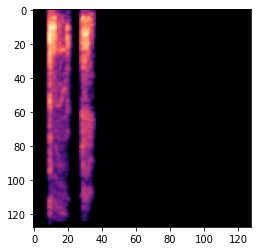

TEST DATA: 1, png=mfcc_03807.png, id=03807
TEST DATA: 2, png=mfcc_03808.png, id=03808
TEST DATA: 3, png=mfcc_03809.png, id=03809
TEST DATA: 4, png=mfcc_03810.png, id=03810
TEST DATA: 5, png=mfcc_03811.png, id=03811
TEST DATA: 6, png=mfcc_03812.png, id=03812
TEST DATA: 7, png=mfcc_03813.png, id=03813
TEST DATA: 8, png=mfcc_03814.png, id=03814
TEST DATA: 9, png=mfcc_03815.png, id=03815
TEST DATA: 10, png=mfcc_03816.png, id=03816
TEST DATA: 11, png=mfcc_03817.png, id=03817
TEST DATA: 12, png=mfcc_03818.png, id=03818
TEST DATA: 13, png=mfcc_03819.png, id=03819
TEST DATA: 14, png=mfcc_03820.png, id=03820
TEST DATA: 15, png=mfcc_03821.png, id=03821
TEST DATA: 16, png=mfcc_03822.png, id=03822
TEST DATA: 17, png=mfcc_03823.png, id=03823
TEST DATA: 18, png=mfcc_03824.png, id=03824
TEST DATA: 19, png=mfcc_03825.png, id=03825
TEST DATA: 20, png=mfcc_03826.png, id=03826
TEST DATA: 21, png=mfcc_03827.png, id=03827
TEST DATA: 22, png=mfcc_03828.png, id=03828
TEST DATA: 23, png=mfcc_03829.png, id=038

TEST DATA: 205, png=mfcc_04011.png, id=04011
TEST DATA: 206, png=mfcc_04012.png, id=04012
TEST DATA: 207, png=mfcc_04013.png, id=04013
TEST DATA: 208, png=mfcc_04014.png, id=04014
TEST DATA: 209, png=mfcc_04015.png, id=04015
TEST DATA: 210, png=mfcc_04016.png, id=04016
TEST DATA: 211, png=mfcc_04017.png, id=04017
TEST DATA: 212, png=mfcc_04018.png, id=04018
TEST DATA: 213, png=mfcc_04019.png, id=04019
TEST DATA: 214, png=mfcc_04020.png, id=04020
TEST DATA: 215, png=mfcc_04021.png, id=04021
TEST DATA: 216, png=mfcc_04022.png, id=04022
TEST DATA: 217, png=mfcc_04023.png, id=04023
TEST DATA: 218, png=mfcc_04024.png, id=04024
TEST DATA: 219, png=mfcc_04025.png, id=04025
TEST DATA: 220, png=mfcc_04026.png, id=04026
TEST DATA: 221, png=mfcc_04027.png, id=04027
TEST DATA: 222, png=mfcc_04028.png, id=04028
TEST DATA: 223, png=mfcc_04029.png, id=04029
TEST DATA: 224, png=mfcc_04030.png, id=04030
TEST DATA: 225, png=mfcc_04031.png, id=04031
TEST DATA: 226, png=mfcc_04032.png, id=04032
TEST DATA:

TEST DATA: 405, png=mfcc_04211.png, id=04211
TEST DATA: 406, png=mfcc_04212.png, id=04212
TEST DATA: 407, png=mfcc_04213.png, id=04213
TEST DATA: 408, png=mfcc_04214.png, id=04214
TEST DATA: 409, png=mfcc_04215.png, id=04215
TEST DATA: 410, png=mfcc_04216.png, id=04216
TEST DATA: 411, png=mfcc_04217.png, id=04217
TEST DATA: 412, png=mfcc_04218.png, id=04218
TEST DATA: 413, png=mfcc_04219.png, id=04219
TEST DATA: 414, png=mfcc_04220.png, id=04220
TEST DATA: 415, png=mfcc_04221.png, id=04221
TEST DATA: 416, png=mfcc_04222.png, id=04222
TEST DATA: 417, png=mfcc_04223.png, id=04223
TEST DATA: 418, png=mfcc_04224.png, id=04224
TEST DATA: 419, png=mfcc_04225.png, id=04225
TEST DATA: 420, png=mfcc_04226.png, id=04226
TEST DATA: 421, png=mfcc_04227.png, id=04227
TEST DATA: 422, png=mfcc_04228.png, id=04228
TEST DATA: 423, png=mfcc_04229.png, id=04229
TEST DATA: 424, png=mfcc_04230.png, id=04230
TEST DATA: 425, png=mfcc_04231.png, id=04231
TEST DATA: 426, png=mfcc_04232.png, id=04232
TEST DATA:

TEST DATA: 606, png=mfcc_04412.png, id=04412
TEST DATA: 607, png=mfcc_04413.png, id=04413
TEST DATA: 608, png=mfcc_04414.png, id=04414
TEST DATA: 609, png=mfcc_04415.png, id=04415
TEST DATA: 610, png=mfcc_04416.png, id=04416
TEST DATA: 611, png=mfcc_04417.png, id=04417
TEST DATA: 612, png=mfcc_04418.png, id=04418
TEST DATA: 613, png=mfcc_04419.png, id=04419
TEST DATA: 614, png=mfcc_04420.png, id=04420
TEST DATA: 615, png=mfcc_04421.png, id=04421
TEST DATA: 616, png=mfcc_04422.png, id=04422
TEST DATA: 617, png=mfcc_04423.png, id=04423
TEST DATA: 618, png=mfcc_04424.png, id=04424
TEST DATA: 619, png=mfcc_04425.png, id=04425
TEST DATA: 620, png=mfcc_04426.png, id=04426
TEST DATA: 621, png=mfcc_04427.png, id=04427
TEST DATA: 622, png=mfcc_04428.png, id=04428
TEST DATA: 623, png=mfcc_04429.png, id=04429
TEST DATA: 624, png=mfcc_04430.png, id=04430
TEST DATA: 625, png=mfcc_04431.png, id=04431
TEST DATA: 626, png=mfcc_04432.png, id=04432
TEST DATA: 627, png=mfcc_04433.png, id=04433
TEST DATA:

TEST DATA: 803, png=mfcc_04609.png, id=04609
TEST DATA: 804, png=mfcc_04610.png, id=04610
TEST DATA: 805, png=mfcc_04611.png, id=04611
TEST DATA: 806, png=mfcc_04612.png, id=04612
TEST DATA: 807, png=mfcc_04613.png, id=04613
TEST DATA: 808, png=mfcc_04614.png, id=04614
TEST DATA: 809, png=mfcc_04615.png, id=04615
TEST DATA: 810, png=mfcc_04616.png, id=04616
TEST DATA: 811, png=mfcc_04617.png, id=04617
TEST DATA: 812, png=mfcc_04618.png, id=04618
TEST DATA: 813, png=mfcc_04619.png, id=04619
TEST DATA: 814, png=mfcc_04620.png, id=04620
TEST DATA: 815, png=mfcc_04621.png, id=04621
TEST DATA: 816, png=mfcc_04622.png, id=04622
TEST DATA: 817, png=mfcc_04623.png, id=04623
TEST DATA: 818, png=mfcc_04624.png, id=04624
TEST DATA: 819, png=mfcc_04625.png, id=04625
TEST DATA: 820, png=mfcc_04626.png, id=04626
TEST DATA: 821, png=mfcc_04627.png, id=04627
TEST DATA: 822, png=mfcc_04628.png, id=04628
TEST DATA: 823, png=mfcc_04629.png, id=04629
TEST DATA: 824, png=mfcc_04630.png, id=04630
TEST DATA:

TEST DATA: 994, png=mfcc_04800.png, id=04800
TEST DATA: 995, png=mfcc_04801.png, id=04801
TEST DATA: 996, png=mfcc_04802.png, id=04802
TEST DATA: 997, png=mfcc_04803.png, id=04803
TEST DATA: 998, png=mfcc_04804.png, id=04804
TEST DATA: 999, png=mfcc_04805.png, id=04805
TEST DATA: 1000, png=mfcc_04806.png, id=04806
TEST DATA: 1001, png=mfcc_04807.png, id=04807
TEST DATA: 1002, png=mfcc_04808.png, id=04808
TEST DATA: 1003, png=mfcc_04809.png, id=04809
TEST DATA: 1004, png=mfcc_04810.png, id=04810
TEST DATA: 1005, png=mfcc_04811.png, id=04811
TEST DATA: 1006, png=mfcc_04812.png, id=04812
TEST DATA: 1007, png=mfcc_04813.png, id=04813
TEST DATA: 1008, png=mfcc_04814.png, id=04814
TEST DATA: 1009, png=mfcc_04815.png, id=04815
TEST DATA: 1010, png=mfcc_04816.png, id=04816
TEST DATA: 1011, png=mfcc_04817.png, id=04817
TEST DATA: 1012, png=mfcc_04818.png, id=04818
TEST DATA: 1013, png=mfcc_04819.png, id=04819
TEST DATA: 1014, png=mfcc_04820.png, id=04820
TEST DATA: 1015, png=mfcc_04821.png, id=

TEST DATA: 1197, png=mfcc_05003.png, id=05003
TEST DATA: 1198, png=mfcc_05004.png, id=05004
TEST DATA: 1199, png=mfcc_05005.png, id=05005
TEST DATA: 1200, png=mfcc_05006.png, id=05006
TEST DATA: 1201, png=mfcc_05007.png, id=05007
TEST DATA: 1202, png=mfcc_05008.png, id=05008
TEST DATA: 1203, png=mfcc_05009.png, id=05009
TEST DATA: 1204, png=mfcc_05010.png, id=05010
TEST DATA: 1205, png=mfcc_05011.png, id=05011
TEST DATA: 1206, png=mfcc_05012.png, id=05012
TEST DATA: 1207, png=mfcc_05013.png, id=05013
TEST DATA: 1208, png=mfcc_05014.png, id=05014
TEST DATA: 1209, png=mfcc_05015.png, id=05015
TEST DATA: 1210, png=mfcc_05016.png, id=05016
TEST DATA: 1211, png=mfcc_05017.png, id=05017
TEST DATA: 1212, png=mfcc_05018.png, id=05018
TEST DATA: 1213, png=mfcc_05019.png, id=05019
TEST DATA: 1214, png=mfcc_05020.png, id=05020
TEST DATA: 1215, png=mfcc_05021.png, id=05021
TEST DATA: 1216, png=mfcc_05022.png, id=05022
TEST DATA: 1217, png=mfcc_05023.png, id=05023
TEST DATA: 1218, png=mfcc_05024.pn

TEST DATA: 1388, png=mfcc_05194.png, id=05194
TEST DATA: 1389, png=mfcc_05195.png, id=05195
TEST DATA: 1390, png=mfcc_05196.png, id=05196
TEST DATA: 1391, png=mfcc_05197.png, id=05197
TEST DATA: 1392, png=mfcc_05198.png, id=05198
TEST DATA: 1393, png=mfcc_05199.png, id=05199
TEST DATA: 1394, png=mfcc_05200.png, id=05200
TEST DATA: 1395, png=mfcc_05201.png, id=05201
TEST DATA: 1396, png=mfcc_05202.png, id=05202
TEST DATA: 1397, png=mfcc_05203.png, id=05203
TEST DATA: 1398, png=mfcc_05204.png, id=05204
TEST DATA: 1399, png=mfcc_05205.png, id=05205
TEST DATA: 1400, png=mfcc_05206.png, id=05206
TEST DATA: 1401, png=mfcc_05207.png, id=05207
TEST DATA: 1402, png=mfcc_05208.png, id=05208
TEST DATA: 1403, png=mfcc_05209.png, id=05209
TEST DATA: 1404, png=mfcc_05210.png, id=05210
TEST DATA: 1405, png=mfcc_05211.png, id=05211
TEST DATA: 1406, png=mfcc_05212.png, id=05212
TEST DATA: 1407, png=mfcc_05213.png, id=05213
TEST DATA: 1408, png=mfcc_05214.png, id=05214
TEST DATA: 1409, png=mfcc_05215.pn

TEST DATA: 1577, png=mfcc_05383.png, id=05383
TEST DATA: 1578, png=mfcc_05384.png, id=05384
TEST DATA: 1579, png=mfcc_05385.png, id=05385
TEST DATA: 1580, png=mfcc_05386.png, id=05386
TEST DATA: 1581, png=mfcc_05387.png, id=05387
TEST DATA: 1582, png=mfcc_05388.png, id=05388
TEST DATA: 1583, png=mfcc_05389.png, id=05389
TEST DATA: 1584, png=mfcc_05390.png, id=05390
TEST DATA: 1585, png=mfcc_05391.png, id=05391
TEST DATA: 1586, png=mfcc_05392.png, id=05392
TEST DATA: 1587, png=mfcc_05393.png, id=05393
TEST DATA: 1588, png=mfcc_05394.png, id=05394
TEST DATA: 1589, png=mfcc_05395.png, id=05395
TEST DATA: 1590, png=mfcc_05396.png, id=05396
TEST DATA: 1591, png=mfcc_05397.png, id=05397
TEST DATA: 1592, png=mfcc_05398.png, id=05398
TEST DATA: 1593, png=mfcc_05399.png, id=05399
TEST DATA: 1594, png=mfcc_05400.png, id=05400
TEST DATA: 1595, png=mfcc_05401.png, id=05401
TEST DATA: 1596, png=mfcc_05402.png, id=05402
TEST DATA: 1597, png=mfcc_05403.png, id=05403
TEST DATA: 1598, png=mfcc_05404.pn

TEST DATA: 1780, png=mfcc_05586.png, id=05586
TEST DATA: 1781, png=mfcc_05587.png, id=05587
TEST DATA: 1782, png=mfcc_05588.png, id=05588
TEST DATA: 1783, png=mfcc_05589.png, id=05589
TEST DATA: 1784, png=mfcc_05590.png, id=05590
TEST DATA: 1785, png=mfcc_05591.png, id=05591
TEST DATA: 1786, png=mfcc_05592.png, id=05592
TEST DATA: 1787, png=mfcc_05593.png, id=05593
TEST DATA: 1788, png=mfcc_05594.png, id=05594
TEST DATA: 1789, png=mfcc_05595.png, id=05595
TEST DATA: 1790, png=mfcc_05596.png, id=05596
TEST DATA: 1791, png=mfcc_05597.png, id=05597
TEST DATA: 1792, png=mfcc_05598.png, id=05598
TEST DATA: 1793, png=mfcc_05599.png, id=05599
TEST DATA: 1794, png=mfcc_05600.png, id=05600
TEST DATA: 1795, png=mfcc_05601.png, id=05601
TEST DATA: 1796, png=mfcc_05602.png, id=05602
TEST DATA: 1797, png=mfcc_05603.png, id=05603
TEST DATA: 1798, png=mfcc_05604.png, id=05604
TEST DATA: 1799, png=mfcc_05605.png, id=05605
TEST DATA: 1800, png=mfcc_05606.png, id=05606
TEST DATA: 1801, png=mfcc_05607.pn

TEST DATA: 1963, png=mfcc_05769.png, id=05769
TEST DATA: 1964, png=mfcc_05770.png, id=05770
TEST DATA: 1965, png=mfcc_05771.png, id=05771
TEST DATA: 1966, png=mfcc_05772.png, id=05772
TEST DATA: 1967, png=mfcc_05773.png, id=05773
TEST DATA: 1968, png=mfcc_05774.png, id=05774
TEST DATA: 1969, png=mfcc_05775.png, id=05775
TEST DATA: 1970, png=mfcc_05776.png, id=05776
TEST DATA: 1971, png=mfcc_05777.png, id=05777
TEST DATA: 1972, png=mfcc_05778.png, id=05778
TEST DATA: 1973, png=mfcc_05779.png, id=05779
TEST DATA: 1974, png=mfcc_05780.png, id=05780
TEST DATA: 1975, png=mfcc_05781.png, id=05781
TEST DATA: 1976, png=mfcc_05782.png, id=05782
TEST DATA: 1977, png=mfcc_05783.png, id=05783
TEST DATA: 1978, png=mfcc_05784.png, id=05784
TEST DATA: 1979, png=mfcc_05785.png, id=05785
TEST DATA: 1980, png=mfcc_05786.png, id=05786
TEST DATA: 1981, png=mfcc_05787.png, id=05787
TEST DATA: 1982, png=mfcc_05788.png, id=05788
TEST DATA: 1983, png=mfcc_05789.png, id=05789
TEST DATA: 1984, png=mfcc_05790.pn

TEST DATA: 2158, png=mfcc_05964.png, id=05964
TEST DATA: 2159, png=mfcc_05965.png, id=05965
TEST DATA: 2160, png=mfcc_05966.png, id=05966
TEST DATA: 2161, png=mfcc_05967.png, id=05967
TEST DATA: 2162, png=mfcc_05968.png, id=05968
TEST DATA: 2163, png=mfcc_05969.png, id=05969
TEST DATA: 2164, png=mfcc_05970.png, id=05970
TEST DATA: 2165, png=mfcc_05971.png, id=05971
TEST DATA: 2166, png=mfcc_05972.png, id=05972
TEST DATA: 2167, png=mfcc_05973.png, id=05973
TEST DATA: 2168, png=mfcc_05974.png, id=05974
TEST DATA: 2169, png=mfcc_05975.png, id=05975
TEST DATA: 2170, png=mfcc_05976.png, id=05976
TEST DATA: 2171, png=mfcc_05977.png, id=05977
TEST DATA: 2172, png=mfcc_05978.png, id=05978
TEST DATA: 2173, png=mfcc_05979.png, id=05979
TEST DATA: 2174, png=mfcc_05980.png, id=05980
TEST DATA: 2175, png=mfcc_05981.png, id=05981
TEST DATA: 2176, png=mfcc_05982.png, id=05982
TEST DATA: 2177, png=mfcc_05983.png, id=05983
TEST DATA: 2178, png=mfcc_05984.png, id=05984
TEST DATA: 2179, png=mfcc_05985.pn

TEST DATA: 2339, png=mfcc_06145.png, id=06145
TEST DATA: 2340, png=mfcc_06146.png, id=06146
TEST DATA: 2341, png=mfcc_06147.png, id=06147
TEST DATA: 2342, png=mfcc_06148.png, id=06148
TEST DATA: 2343, png=mfcc_06149.png, id=06149
TEST DATA: 2344, png=mfcc_06150.png, id=06150
TEST DATA: 2345, png=mfcc_06151.png, id=06151
TEST DATA: 2346, png=mfcc_06152.png, id=06152
TEST DATA: 2347, png=mfcc_06153.png, id=06153
TEST DATA: 2348, png=mfcc_06154.png, id=06154
TEST DATA: 2349, png=mfcc_06155.png, id=06155
TEST DATA: 2350, png=mfcc_06156.png, id=06156
TEST DATA: 2351, png=mfcc_06157.png, id=06157
TEST DATA: 2352, png=mfcc_06158.png, id=06158
TEST DATA: 2353, png=mfcc_06159.png, id=06159
TEST DATA: 2354, png=mfcc_06160.png, id=06160
TEST DATA: 2355, png=mfcc_06161.png, id=06161
TEST DATA: 2356, png=mfcc_06162.png, id=06162
TEST DATA: 2357, png=mfcc_06163.png, id=06163
TEST DATA: 2358, png=mfcc_06164.png, id=06164
TEST DATA: 2359, png=mfcc_06165.png, id=06165
TEST DATA: 2360, png=mfcc_06166.pn

TEST DATA: 2521, png=mfcc_06327.png, id=06327
TEST DATA: 2522, png=mfcc_06328.png, id=06328
TEST DATA: 2523, png=mfcc_06329.png, id=06329
TEST DATA: 2524, png=mfcc_06330.png, id=06330
TEST DATA: 2525, png=mfcc_06331.png, id=06331
TEST DATA: 2526, png=mfcc_06332.png, id=06332
TEST DATA: 2527, png=mfcc_06333.png, id=06333
TEST DATA: 2528, png=mfcc_06334.png, id=06334
TEST DATA: 2529, png=mfcc_06335.png, id=06335
TEST DATA: 2530, png=mfcc_06336.png, id=06336
TEST DATA: 2531, png=mfcc_06337.png, id=06337
TEST DATA: 2532, png=mfcc_06338.png, id=06338
TEST DATA: 2533, png=mfcc_06339.png, id=06339
TEST DATA: 2534, png=mfcc_06340.png, id=06340
TEST DATA: 2535, png=mfcc_06341.png, id=06341
TEST DATA: 2536, png=mfcc_06342.png, id=06342
TEST DATA: 2537, png=mfcc_06343.png, id=06343
TEST DATA: 2538, png=mfcc_06344.png, id=06344
TEST DATA: 2539, png=mfcc_06345.png, id=06345
TEST DATA: 2540, png=mfcc_06346.png, id=06346
TEST DATA: 2541, png=mfcc_06347.png, id=06347
TEST DATA: 2542, png=mfcc_06348.pn

TEST DATA: 2702, png=mfcc_06508.png, id=06508
TEST DATA: 2703, png=mfcc_06509.png, id=06509
TEST DATA: 2704, png=mfcc_06510.png, id=06510
TEST DATA: 2705, png=mfcc_06511.png, id=06511
TEST DATA: 2706, png=mfcc_06512.png, id=06512
TEST DATA: 2707, png=mfcc_06513.png, id=06513
TEST DATA: 2708, png=mfcc_06514.png, id=06514
TEST DATA: 2709, png=mfcc_06515.png, id=06515
TEST DATA: 2710, png=mfcc_06516.png, id=06516
TEST DATA: 2711, png=mfcc_06517.png, id=06517
TEST DATA: 2712, png=mfcc_06518.png, id=06518
TEST DATA: 2713, png=mfcc_06519.png, id=06519
TEST DATA: 2714, png=mfcc_06520.png, id=06520
TEST DATA: 2715, png=mfcc_06521.png, id=06521
TEST DATA: 2716, png=mfcc_06522.png, id=06522
TEST DATA: 2717, png=mfcc_06523.png, id=06523
TEST DATA: 2718, png=mfcc_06524.png, id=06524
TEST DATA: 2719, png=mfcc_06525.png, id=06525
TEST DATA: 2720, png=mfcc_06526.png, id=06526
TEST DATA: 2721, png=mfcc_06527.png, id=06527
TEST DATA: 2722, png=mfcc_06528.png, id=06528
TEST DATA: 2723, png=mfcc_06529.pn

TEST DATA: 2885, png=mfcc_06691.png, id=06691
TEST DATA: 2886, png=mfcc_06692.png, id=06692
TEST DATA: 2887, png=mfcc_06693.png, id=06693
TEST DATA: 2888, png=mfcc_06694.png, id=06694
TEST DATA: 2889, png=mfcc_06695.png, id=06695
TEST DATA: 2890, png=mfcc_06696.png, id=06696
TEST DATA: 2891, png=mfcc_06697.png, id=06697
TEST DATA: 2892, png=mfcc_06698.png, id=06698
TEST DATA: 2893, png=mfcc_06699.png, id=06699
TEST DATA: 2894, png=mfcc_06700.png, id=06700
TEST DATA: 2895, png=mfcc_06701.png, id=06701
TEST DATA: 2896, png=mfcc_06702.png, id=06702
TEST DATA: 2897, png=mfcc_06703.png, id=06703
TEST DATA: 2898, png=mfcc_06704.png, id=06704
TEST DATA: 2899, png=mfcc_06705.png, id=06705
TEST DATA: 2900, png=mfcc_06706.png, id=06706
TEST DATA: 2901, png=mfcc_06707.png, id=06707
TEST DATA: 2902, png=mfcc_06708.png, id=06708
TEST DATA: 2903, png=mfcc_06709.png, id=06709
TEST DATA: 2904, png=mfcc_06710.png, id=06710
TEST DATA: 2905, png=mfcc_06711.png, id=06711
TEST DATA: 2906, png=mfcc_06712.pn

TEST DATA: 3066, png=mfcc_06872.png, id=06872
TEST DATA: 3067, png=mfcc_06873.png, id=06873
TEST DATA: 3068, png=mfcc_06874.png, id=06874
TEST DATA: 3069, png=mfcc_06875.png, id=06875
TEST DATA: 3070, png=mfcc_06876.png, id=06876
TEST DATA: 3071, png=mfcc_06877.png, id=06877
TEST DATA: 3072, png=mfcc_06878.png, id=06878
TEST DATA: 3073, png=mfcc_06879.png, id=06879
TEST DATA: 3074, png=mfcc_06880.png, id=06880
TEST DATA: 3075, png=mfcc_06881.png, id=06881
TEST DATA: 3076, png=mfcc_06882.png, id=06882
TEST DATA: 3077, png=mfcc_06883.png, id=06883
TEST DATA: 3078, png=mfcc_06884.png, id=06884
TEST DATA: 3079, png=mfcc_06885.png, id=06885
TEST DATA: 3080, png=mfcc_06886.png, id=06886
TEST DATA: 3081, png=mfcc_06887.png, id=06887
TEST DATA: 3082, png=mfcc_06888.png, id=06888
TEST DATA: 3083, png=mfcc_06889.png, id=06889
TEST DATA: 3084, png=mfcc_06890.png, id=06890
TEST DATA: 3085, png=mfcc_06891.png, id=06891
TEST DATA: 3086, png=mfcc_06892.png, id=06892
TEST DATA: 3087, png=mfcc_06893.pn

TEST DATA: 3251, png=mfcc_07057.png, id=07057
TEST DATA: 3252, png=mfcc_07058.png, id=07058
TEST DATA: 3253, png=mfcc_07059.png, id=07059
TEST DATA: 3254, png=mfcc_07060.png, id=07060
TEST DATA: 3255, png=mfcc_07061.png, id=07061
TEST DATA: 3256, png=mfcc_07062.png, id=07062
TEST DATA: 3257, png=mfcc_07063.png, id=07063
TEST DATA: 3258, png=mfcc_07064.png, id=07064
TEST DATA: 3259, png=mfcc_07065.png, id=07065
TEST DATA: 3260, png=mfcc_07066.png, id=07066
TEST DATA: 3261, png=mfcc_07067.png, id=07067
TEST DATA: 3262, png=mfcc_07068.png, id=07068
TEST DATA: 3263, png=mfcc_07069.png, id=07069
TEST DATA: 3264, png=mfcc_07070.png, id=07070
TEST DATA: 3265, png=mfcc_07071.png, id=07071
TEST DATA: 3266, png=mfcc_07072.png, id=07072
TEST DATA: 3267, png=mfcc_07073.png, id=07073
TEST DATA: 3268, png=mfcc_07074.png, id=07074
TEST DATA: 3269, png=mfcc_07075.png, id=07075
TEST DATA: 3270, png=mfcc_07076.png, id=07076
TEST DATA: 3271, png=mfcc_07077.png, id=07077
TEST DATA: 3272, png=mfcc_07078.pn

TEST DATA: 3445, png=mfcc_07251.png, id=07251
TEST DATA: 3446, png=mfcc_07252.png, id=07252
TEST DATA: 3447, png=mfcc_07253.png, id=07253
TEST DATA: 3448, png=mfcc_07254.png, id=07254
TEST DATA: 3449, png=mfcc_07255.png, id=07255
TEST DATA: 3450, png=mfcc_07256.png, id=07256
TEST DATA: 3451, png=mfcc_07257.png, id=07257
TEST DATA: 3452, png=mfcc_07258.png, id=07258
TEST DATA: 3453, png=mfcc_07259.png, id=07259
TEST DATA: 3454, png=mfcc_07260.png, id=07260
TEST DATA: 3455, png=mfcc_07261.png, id=07261
TEST DATA: 3456, png=mfcc_07262.png, id=07262
TEST DATA: 3457, png=mfcc_07263.png, id=07263
TEST DATA: 3458, png=mfcc_07264.png, id=07264
TEST DATA: 3459, png=mfcc_07265.png, id=07265
TEST DATA: 3460, png=mfcc_07266.png, id=07266
TEST DATA: 3461, png=mfcc_07267.png, id=07267
TEST DATA: 3462, png=mfcc_07268.png, id=07268
TEST DATA: 3463, png=mfcc_07269.png, id=07269
TEST DATA: 3464, png=mfcc_07270.png, id=07270
TEST DATA: 3465, png=mfcc_07271.png, id=07271
TEST DATA: 3466, png=mfcc_07272.pn

TEST DATA: 3641, png=mfcc_07447.png, id=07447
TEST DATA: 3642, png=mfcc_07448.png, id=07448
TEST DATA: 3643, png=mfcc_07449.png, id=07449
TEST DATA: 3644, png=mfcc_07450.png, id=07450
TEST DATA: 3645, png=mfcc_07451.png, id=07451
TEST DATA: 3646, png=mfcc_07452.png, id=07452
TEST DATA: 3647, png=mfcc_07453.png, id=07453
TEST DATA: 3648, png=mfcc_07454.png, id=07454
TEST DATA: 3649, png=mfcc_07455.png, id=07455
TEST DATA: 3650, png=mfcc_07456.png, id=07456
TEST DATA: 3651, png=mfcc_07457.png, id=07457
TEST DATA: 3652, png=mfcc_07458.png, id=07458
TEST DATA: 3653, png=mfcc_07459.png, id=07459
TEST DATA: 3654, png=mfcc_07460.png, id=07460
TEST DATA: 3655, png=mfcc_07461.png, id=07461
TEST DATA: 3656, png=mfcc_07462.png, id=07462
TEST DATA: 3657, png=mfcc_07463.png, id=07463
TEST DATA: 3658, png=mfcc_07464.png, id=07464
TEST DATA: 3659, png=mfcc_07465.png, id=07465
TEST DATA: 3660, png=mfcc_07466.png, id=07466
TEST DATA: 3661, png=mfcc_07467.png, id=07467
TEST DATA: 3662, png=mfcc_07468.pn

TEST DATA: 3823, png=mfcc_07629.png, id=07629
TEST DATA: 3824, png=mfcc_07630.png, id=07630
TEST DATA: 3825, png=mfcc_07631.png, id=07631
TEST DATA: 3826, png=mfcc_07632.png, id=07632
TEST DATA: 3827, png=mfcc_07633.png, id=07633
TEST DATA: 3828, png=mfcc_07634.png, id=07634
TEST DATA: 3829, png=mfcc_07635.png, id=07635
TEST DATA: 3830, png=mfcc_07636.png, id=07636
TEST DATA: 3831, png=mfcc_07637.png, id=07637
TEST DATA: 3832, png=mfcc_07638.png, id=07638
TEST DATA: 3833, png=mfcc_07639.png, id=07639
TEST DATA: 3834, png=mfcc_07640.png, id=07640
TEST DATA: 3835, png=mfcc_07641.png, id=07641
TEST DATA: 3836, png=mfcc_07642.png, id=07642
TEST DATA: 3837, png=mfcc_07643.png, id=07643
TEST DATA: 3838, png=mfcc_07644.png, id=07644
TEST DATA: 3839, png=mfcc_07645.png, id=07645
TEST DATA: 3840, png=mfcc_07646.png, id=07646
TEST DATA: 3841, png=mfcc_07647.png, id=07647
TEST DATA: 3842, png=mfcc_07648.png, id=07648
TEST DATA: 3843, png=mfcc_07649.png, id=07649
TEST DATA: 3844, png=mfcc_07650.pn

TEST DATA: 4013, png=mfcc_07819.png, id=07819
TEST DATA: 4014, png=mfcc_07820.png, id=07820
TEST DATA: 4015, png=mfcc_07821.png, id=07821
TEST DATA: 4016, png=mfcc_07822.png, id=07822
TEST DATA: 4017, png=mfcc_07823.png, id=07823
TEST DATA: 4018, png=mfcc_07824.png, id=07824
TEST DATA: 4019, png=mfcc_07825.png, id=07825
TEST DATA: 4020, png=mfcc_07826.png, id=07826
TEST DATA: 4021, png=mfcc_07827.png, id=07827
TEST DATA: 4022, png=mfcc_07828.png, id=07828
TEST DATA: 4023, png=mfcc_07829.png, id=07829
TEST DATA: 4024, png=mfcc_07830.png, id=07830
TEST DATA: 4025, png=mfcc_07831.png, id=07831
TEST DATA: 4026, png=mfcc_07832.png, id=07832
TEST DATA: 4027, png=mfcc_07833.png, id=07833
TEST DATA: 4028, png=mfcc_07834.png, id=07834
TEST DATA: 4029, png=mfcc_07835.png, id=07835
TEST DATA: 4030, png=mfcc_07836.png, id=07836
TEST DATA: 4031, png=mfcc_07837.png, id=07837
TEST DATA: 4032, png=mfcc_07838.png, id=07838
TEST DATA: 4033, png=mfcc_07839.png, id=07839
TEST DATA: 4034, png=mfcc_07840.pn

TEST DATA: 4192, png=mfcc_07998.png, id=07998
TEST DATA: 4193, png=mfcc_07999.png, id=07999
TEST DATA: 4194, png=mfcc_08000.png, id=08000
TEST DATA: 4195, png=mfcc_08001.png, id=08001
TEST DATA: 4196, png=mfcc_08002.png, id=08002
TEST DATA: 4197, png=mfcc_08003.png, id=08003
TEST DATA: 4198, png=mfcc_08004.png, id=08004
TEST DATA: 4199, png=mfcc_08005.png, id=08005
TEST DATA: 4200, png=mfcc_08006.png, id=08006
TEST DATA: 4201, png=mfcc_08007.png, id=08007
TEST DATA: 4202, png=mfcc_08008.png, id=08008
TEST DATA: 4203, png=mfcc_08009.png, id=08009
TEST DATA: 4204, png=mfcc_08010.png, id=08010
TEST DATA: 4205, png=mfcc_08011.png, id=08011
TEST DATA: 4206, png=mfcc_08012.png, id=08012
TEST DATA: 4207, png=mfcc_08013.png, id=08013
TEST DATA: 4208, png=mfcc_08014.png, id=08014
TEST DATA: 4209, png=mfcc_08015.png, id=08015
TEST DATA: 4210, png=mfcc_08016.png, id=08016
TEST DATA: 4211, png=mfcc_08017.png, id=08017
TEST DATA: 4212, png=mfcc_08018.png, id=08018
TEST DATA: 4213, png=mfcc_08019.pn

TEST DATA: 4373, png=mfcc_08179.png, id=08179
TEST DATA: 4374, png=mfcc_08180.png, id=08180
TEST DATA: 4375, png=mfcc_08181.png, id=08181
TEST DATA: 4376, png=mfcc_08182.png, id=08182
TEST DATA: 4377, png=mfcc_08183.png, id=08183
TEST DATA: 4378, png=mfcc_08184.png, id=08184
TEST DATA: 4379, png=mfcc_08185.png, id=08185
TEST DATA: 4380, png=mfcc_08186.png, id=08186
TEST DATA: 4381, png=mfcc_08187.png, id=08187
TEST DATA: 4382, png=mfcc_08188.png, id=08188
TEST DATA: 4383, png=mfcc_08189.png, id=08189
TEST DATA: 4384, png=mfcc_08190.png, id=08190
TEST DATA: 4385, png=mfcc_08191.png, id=08191
TEST DATA: 4386, png=mfcc_08192.png, id=08192
TEST DATA: 4387, png=mfcc_08193.png, id=08193
TEST DATA: 4388, png=mfcc_08194.png, id=08194
TEST DATA: 4389, png=mfcc_08195.png, id=08195
TEST DATA: 4390, png=mfcc_08196.png, id=08196
TEST DATA: 4391, png=mfcc_08197.png, id=08197
TEST DATA: 4392, png=mfcc_08198.png, id=08198
TEST DATA: 4393, png=mfcc_08199.png, id=08199
TEST DATA: 4394, png=mfcc_08200.pn

TEST DATA: 4574, png=mfcc_08380.png, id=08380
TEST DATA: 4575, png=mfcc_08381.png, id=08381
TEST DATA: 4576, png=mfcc_08382.png, id=08382
TEST DATA: 4577, png=mfcc_08383.png, id=08383
TEST DATA: 4578, png=mfcc_08384.png, id=08384
TEST DATA: 4579, png=mfcc_08385.png, id=08385
TEST DATA: 4580, png=mfcc_08386.png, id=08386
TEST DATA: 4581, png=mfcc_08387.png, id=08387
TEST DATA: 4582, png=mfcc_08388.png, id=08388
TEST DATA: 4583, png=mfcc_08389.png, id=08389
TEST DATA: 4584, png=mfcc_08390.png, id=08390
TEST DATA: 4585, png=mfcc_08391.png, id=08391
TEST DATA: 4586, png=mfcc_08392.png, id=08392
TEST DATA: 4587, png=mfcc_08393.png, id=08393
TEST DATA: 4588, png=mfcc_08394.png, id=08394
TEST DATA: 4589, png=mfcc_08395.png, id=08395
TEST DATA: 4590, png=mfcc_08396.png, id=08396
TEST DATA: 4591, png=mfcc_08397.png, id=08397
TEST DATA: 4592, png=mfcc_08398.png, id=08398
TEST DATA: 4593, png=mfcc_08399.png, id=08399
TEST DATA: 4594, png=mfcc_08400.png, id=08400
TEST DATA: 4595, png=mfcc_08401.pn

TEST DATA: 4778, png=mfcc_08584.png, id=08584
TEST DATA: 4779, png=mfcc_08585.png, id=08585
TEST DATA: 4780, png=mfcc_08586.png, id=08586
TEST DATA: 4781, png=mfcc_08587.png, id=08587
TEST DATA: 4782, png=mfcc_08588.png, id=08588
TEST DATA: 4783, png=mfcc_08589.png, id=08589
TEST DATA: 4784, png=mfcc_08590.png, id=08590
TEST DATA: 4785, png=mfcc_08591.png, id=08591
TEST DATA: 4786, png=mfcc_08592.png, id=08592
TEST DATA: 4787, png=mfcc_08593.png, id=08593
TEST DATA: 4788, png=mfcc_08594.png, id=08594
TEST DATA: 4789, png=mfcc_08595.png, id=08595
TEST DATA: 4790, png=mfcc_08596.png, id=08596
TEST DATA: 4791, png=mfcc_08597.png, id=08597
TEST DATA: 4792, png=mfcc_08598.png, id=08598
TEST DATA: 4793, png=mfcc_08599.png, id=08599
TEST DATA: 4794, png=mfcc_08600.png, id=08600
TEST DATA: 4795, png=mfcc_08601.png, id=08601
TEST DATA: 4796, png=mfcc_08602.png, id=08602
TEST DATA: 4797, png=mfcc_08603.png, id=08603
TEST DATA: 4798, png=mfcc_08604.png, id=08604
TEST DATA: 4799, png=mfcc_08605.pn

TEST DATA: 4963, png=mfcc_08769.png, id=08769
TEST DATA: 4964, png=mfcc_08770.png, id=08770
TEST DATA: 4965, png=mfcc_08771.png, id=08771
TEST DATA: 4966, png=mfcc_08772.png, id=08772
TEST DATA: 4967, png=mfcc_08773.png, id=08773
TEST DATA: 4968, png=mfcc_08774.png, id=08774
TEST DATA: 4969, png=mfcc_08775.png, id=08775
TEST DATA: 4970, png=mfcc_08776.png, id=08776
TEST DATA: 4971, png=mfcc_08777.png, id=08777
TEST DATA: 4972, png=mfcc_08778.png, id=08778
TEST DATA: 4973, png=mfcc_08779.png, id=08779
TEST DATA: 4974, png=mfcc_08780.png, id=08780
TEST DATA: 4975, png=mfcc_08781.png, id=08781
TEST DATA: 4976, png=mfcc_08782.png, id=08782
TEST DATA: 4977, png=mfcc_08783.png, id=08783
TEST DATA: 4978, png=mfcc_08784.png, id=08784
TEST DATA: 4979, png=mfcc_08785.png, id=08785
TEST DATA: 4980, png=mfcc_08786.png, id=08786
TEST DATA: 4981, png=mfcc_08787.png, id=08787
TEST DATA: 4982, png=mfcc_08788.png, id=08788
TEST DATA: 4983, png=mfcc_08789.png, id=08789
TEST DATA: 4984, png=mfcc_08790.pn

TEST DATA: 5142, png=mfcc_08948.png, id=08948
TEST DATA: 5143, png=mfcc_08949.png, id=08949
TEST DATA: 5144, png=mfcc_08950.png, id=08950
TEST DATA: 5145, png=mfcc_08951.png, id=08951
TEST DATA: 5146, png=mfcc_08952.png, id=08952
TEST DATA: 5147, png=mfcc_08953.png, id=08953
TEST DATA: 5148, png=mfcc_08954.png, id=08954
TEST DATA: 5149, png=mfcc_08955.png, id=08955
TEST DATA: 5150, png=mfcc_08956.png, id=08956
TEST DATA: 5151, png=mfcc_08957.png, id=08957
TEST DATA: 5152, png=mfcc_08958.png, id=08958
TEST DATA: 5153, png=mfcc_08959.png, id=08959
TEST DATA: 5154, png=mfcc_08960.png, id=08960
TEST DATA: 5155, png=mfcc_08961.png, id=08961
TEST DATA: 5156, png=mfcc_08962.png, id=08962
TEST DATA: 5157, png=mfcc_08963.png, id=08963
TEST DATA: 5158, png=mfcc_08964.png, id=08964
TEST DATA: 5159, png=mfcc_08965.png, id=08965
TEST DATA: 5160, png=mfcc_08966.png, id=08966
TEST DATA: 5161, png=mfcc_08967.png, id=08967
TEST DATA: 5162, png=mfcc_08968.png, id=08968
TEST DATA: 5163, png=mfcc_08969.pn

TEST DATA: 5325, png=mfcc_09131.png, id=09131
TEST DATA: 5326, png=mfcc_09132.png, id=09132
TEST DATA: 5327, png=mfcc_09133.png, id=09133
TEST DATA: 5328, png=mfcc_09134.png, id=09134
TEST DATA: 5329, png=mfcc_09135.png, id=09135
TEST DATA: 5330, png=mfcc_09136.png, id=09136
TEST DATA: 5331, png=mfcc_09137.png, id=09137
TEST DATA: 5332, png=mfcc_09138.png, id=09138
TEST DATA: 5333, png=mfcc_09139.png, id=09139
TEST DATA: 5334, png=mfcc_09140.png, id=09140
TEST DATA: 5335, png=mfcc_09141.png, id=09141
TEST DATA: 5336, png=mfcc_09142.png, id=09142
TEST DATA: 5337, png=mfcc_09143.png, id=09143
TEST DATA: 5338, png=mfcc_09144.png, id=09144
TEST DATA: 5339, png=mfcc_09145.png, id=09145
TEST DATA: 5340, png=mfcc_09146.png, id=09146
TEST DATA: 5341, png=mfcc_09147.png, id=09147
TEST DATA: 5342, png=mfcc_09148.png, id=09148
TEST DATA: 5343, png=mfcc_09149.png, id=09149
TEST DATA: 5344, png=mfcc_09150.png, id=09150
TEST DATA: 5345, png=mfcc_09151.png, id=09151
TEST DATA: 5346, png=mfcc_09152.pn

TEST DATA: 5512, png=mfcc_09318.png, id=09318
TEST DATA: 5513, png=mfcc_09319.png, id=09319
TEST DATA: 5514, png=mfcc_09320.png, id=09320
TEST DATA: 5515, png=mfcc_09321.png, id=09321
TEST DATA: 5516, png=mfcc_09322.png, id=09322
TEST DATA: 5517, png=mfcc_09323.png, id=09323
TEST DATA: 5518, png=mfcc_09324.png, id=09324
TEST DATA: 5519, png=mfcc_09325.png, id=09325
TEST DATA: 5520, png=mfcc_09326.png, id=09326
TEST DATA: 5521, png=mfcc_09327.png, id=09327
TEST DATA: 5522, png=mfcc_09328.png, id=09328
TEST DATA: 5523, png=mfcc_09329.png, id=09329
TEST DATA: 5524, png=mfcc_09330.png, id=09330
TEST DATA: 5525, png=mfcc_09331.png, id=09331
TEST DATA: 5526, png=mfcc_09332.png, id=09332
TEST DATA: 5527, png=mfcc_09333.png, id=09333
TEST DATA: 5528, png=mfcc_09334.png, id=09334
TEST DATA: 5529, png=mfcc_09335.png, id=09335
TEST DATA: 5530, png=mfcc_09336.png, id=09336
TEST DATA: 5531, png=mfcc_09337.png, id=09337
TEST DATA: 5532, png=mfcc_09338.png, id=09338
TEST DATA: 5533, png=mfcc_09339.pn

TEST DATA: 5696, png=mfcc_09502.png, id=09502
TEST DATA: 5697, png=mfcc_09503.png, id=09503
TEST DATA: 5698, png=mfcc_09504.png, id=09504
TEST DATA: 5699, png=mfcc_09505.png, id=09505
TEST DATA: 5700, png=mfcc_09506.png, id=09506
TEST DATA: 5701, png=mfcc_09507.png, id=09507
TEST DATA: 5702, png=mfcc_09508.png, id=09508
TEST DATA: 5703, png=mfcc_09509.png, id=09509
TEST DATA: 5704, png=mfcc_09510.png, id=09510
TEST DATA: 5705, png=mfcc_09511.png, id=09511
TEST DATA: 5706, png=mfcc_09512.png, id=09512
TEST DATA: 5707, png=mfcc_09513.png, id=09513
TEST DATA: 5708, png=mfcc_09514.png, id=09514
TEST DATA: 5709, png=mfcc_09515.png, id=09515
TEST DATA: 5710, png=mfcc_09516.png, id=09516
TEST DATA: 5711, png=mfcc_09517.png, id=09517
TEST DATA: 5712, png=mfcc_09518.png, id=09518
TEST DATA: 5713, png=mfcc_09519.png, id=09519
TEST DATA: 5714, png=mfcc_09520.png, id=09520
TEST DATA: 5715, png=mfcc_09521.png, id=09521
TEST DATA: 5716, png=mfcc_09522.png, id=09522
TEST DATA: 5717, png=mfcc_09523.pn

In [13]:
'''
테스팅 - 학습한 모델을 이용하여 예측하기. 결과값은 csv에 저장

'''

list_png = glob('open/png2/test/*.png')

image_list = []
label_list = []

df1 = pd.read_csv('open/test_data.csv')
id_    = df1.loc[:, 'id']

for kk, fname_png in enumerate(list_png):
    
    img = imageio.imread(fname_png)
    img = img[:,:,:3] # transparency 항목은 제외함.
    
    _, fname1 = os.path.split(fname_png)
    
    print(f'TEST DATA: {kk}, png={fname1}, id={str(id_[kk]).zfill(5)}')
    
    if kk == 0:    
        print(img.shape)
        
        plt.figure()
        plt.imshow(img)
        plt.show()
    
    image_list.append(img)

image_arr = np.stack(image_list, axis=0)

print(image_arr.shape)

X_test = image_arr

In [14]:
fname_model = 'model_CNN\model_2022-07-03_090614\CNN_50.h5'  # 모델 파일 입력.

device_no = '/cpu:0'

print(X_test.shape)

list_prob = []

with K.tf.device(device_no):
    model = keras.models.load_model(fname_model, compile=False)
    nsamp = 100
    for ii in range(0, X_test.shape[0], nsamp):
        print(f'ii={ii}')
        prob_score = model.predict(X_test[ii:min(ii+nsamp, X_test.shape[0]), :, :, :], batch_size=nsamp, verbose=0)        
        list_prob.append(prob_score)
        
prob_score_arr = np.vstack(list_prob)
print(prob_score_arr.shape)


(5732, 128, 128, 3)
ii=0
ii=100
ii=200
ii=300
ii=400
ii=500
ii=600
ii=700
ii=800
ii=900
ii=1000
ii=1100
ii=1200
ii=1300
ii=1400
ii=1500
ii=1600
ii=1700
ii=1800
ii=1900
ii=2000
ii=2100
ii=2200
ii=2300
ii=2400
ii=2500
ii=2600
ii=2700
ii=2800
ii=2900
ii=3000
ii=3100
ii=3200
ii=3300
ii=3400
ii=3500
ii=3600
ii=3700
ii=3800
ii=3900
ii=4000
ii=4100
ii=4200
ii=4300
ii=4400
ii=4500
ii=4600
ii=4700
ii=4800
ii=4900
ii=5000
ii=5100
ii=5200
ii=5300
ii=5400
ii=5500
ii=5600
ii=5700
(5732, 2)


In [16]:
print(prob_score_arr[:20, :])
ntest = prob_score_arr.shape[0]

print(ntest)

preds = []

for jj in range(ntest):
    if prob_score_arr[jj, 1] > 0.5:
        preds.append(1)
    else:
        preds.append(0)

preds = np.stack(preds, axis=0)

print(preds.shape)

5732
(5732,)


In [17]:
        
submission = pd.read_csv('./sample_submission.csv')
submission['covid19'] = preds
submission.to_csv('./submit4.csv', index=False)